# PUBG Finish Placement Prediction #

## 목표
 * 배틀그라운드 사용자 데이터 EDA
 * 데이터를 전처리 하고 예측 모델 생성
 * 데이터들의 Feature를 모델에 적용하여 순위 예측

## Feature 설명 ##
 * groupId - 한 매치 안에서 서로 다른 유저를 구분하기 위한 ID. 같은 유저 그룹일지라도 다른 매치에서는 매번 다른 ID가 주어진다.
 * matchId - 매치 ID. 트레인과 테스트 간에 중복되는 ID는 존재하지 않는다
 * assists - 팀원이 죽인 적들 중에 데미지를 가해 도운 횟수
 * boosts - 사용된 부스트 아이템의 개수
 * damageDealt - 가한 데미지의 총합. 스스로 가한 데미지는 제외
 * DBNOs - 기절시킨 적의 수
 * headshotKills - 헤드샷으로 죽은 적의 수
 * heals - 사용된 치료 아이템의 개수
 * killPlace - 매치에서 킬 수 기준으로 집계한 등수
 * killPoints - 킬 랭킹 기반의 포인트
 * kills - 죽인 적의 횟수
 * killStreaks - 짧은 시간 내에 가장 많이 적을 죽인 횟수
 * longest kills 죽인 적과 가장 긴 거리
 * match type 게임타입 solo, duo, squad, solo-fpp, duo-fpp, squad-fpp
 * maxPlace - 매치 내에서 가장 낮은 등수. 가끔 데이터가 등수를 거르기도해서 때문에 총 그룹의 수와 일치하지 않을 수 있음
 * numGroups - 매치 내에서 총 그룹의 수
 * revives - 유저가 팀원을 살린 횟수
 * rideDistance - 차량을 통해 이동한 총거리 (미터)
 * roadKills - 차량 탑승 도중에 적을 죽인 횟수
 * swimDistance - 유저가 수영한 총거리 (미터)
 * teamKills - 유저가 같은 팀원을 죽인 횟수
 * vehicleDestroys - 이동차량을 파괴한 횟수
 * walkDistance - 걸어서 이동한 총거리 (미터)
 * weaponsAcquired - 총 획득한 무기의 수
 * winPoints - 승리에 기반한 유저의 랭킹 포인트
 * winPlacePerc - 백분위수에 기반한 타겟의 예측. 1은 1등을 의미하며 0은 마지막 등수를 의미한다.

## 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

Duplicate key in file WindowsPath('c:/Users/Master/anaconda3/envs/oks/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('c:/Users/Master/anaconda3/envs/oks/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('font.size: 20.0')


In [3]:
train_data = pd.read_csv('./pubg-finish-placement-prediction/train_V2.csv')
test_data = pd.read_csv('./pubg-finish-placement-prediction/test_V2.csv')

## 데이터 확인하기

In [55]:
print(train_data.shape)
print(test_data.shape)

(4446966, 29)
(1934174, 28)


In [56]:
train_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [58]:
test_data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## Match Type

In [60]:
m_types = train_data.loc[:,'matchType'].value_counts().to_frame().reset_index()
m_types.columns = ['Type', 'Count']
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


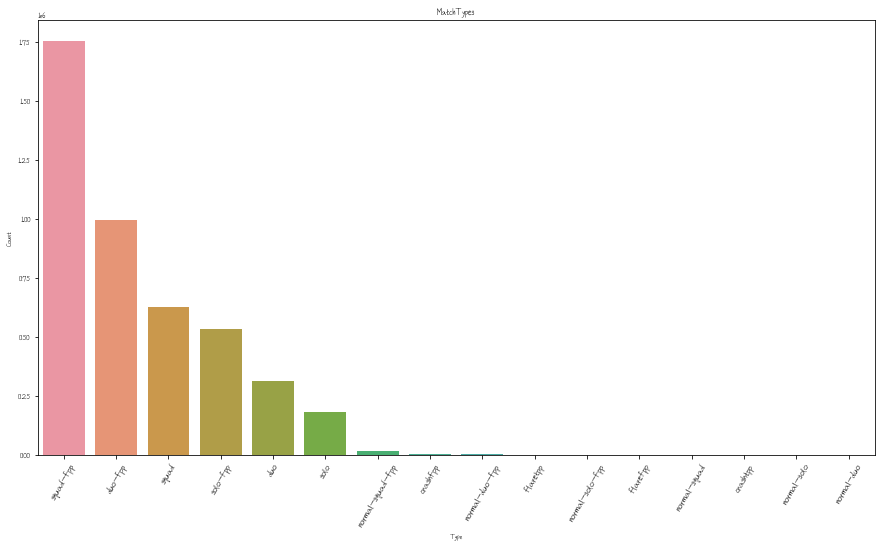

In [61]:
plt.figure(figsize=(15, 8))
ticks = m_types.Type.values
ax = sns.barplot(x='Type', y='Count', data=m_types)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title('MatchTypes')
plt.show()

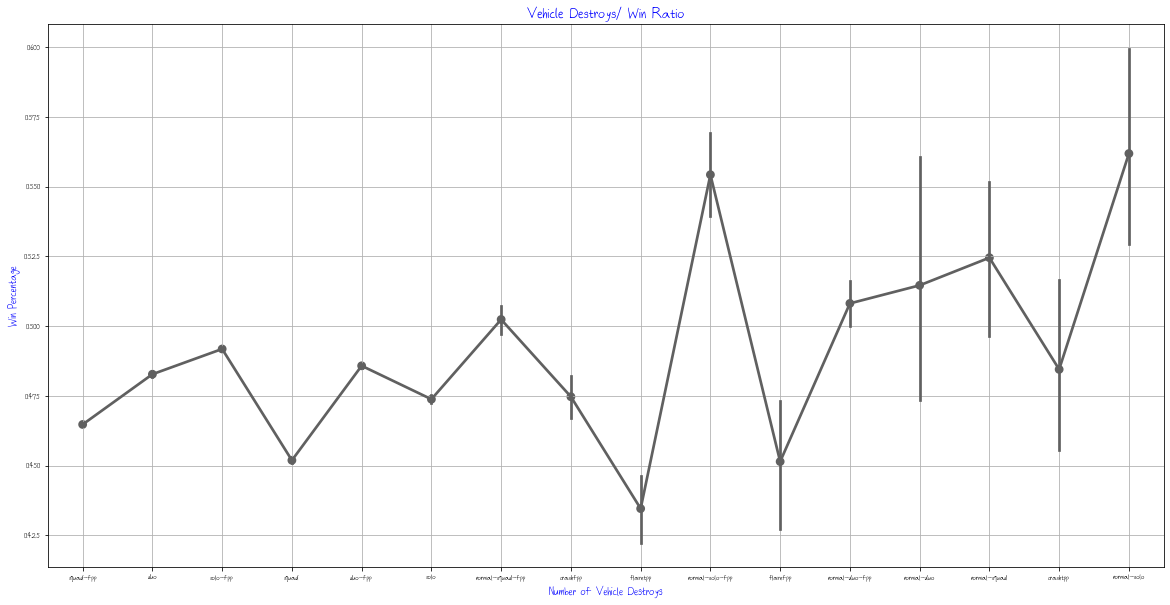

In [62]:
data = train_data.copy()
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='matchType',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

## KILL

![nn](./maxresdefault.jpg)

In [63]:
print('유저들의 평균 킬:', train_data['kills'].mean())
print('유저들 중 최하 킬:', train_data['kills'].min())
print('유저들 중 최다 킬:', train_data['kills'].max())
print('99%의 유저들의 킬:', train_data['kills'].quantile(0.99),'이하')

유저들의 평균 킬: 0.9247833241810259
유저들 중 최하 킬: 0
유저들 중 최다 킬: 72
99%의 유저들의 킬: 7.0 이하


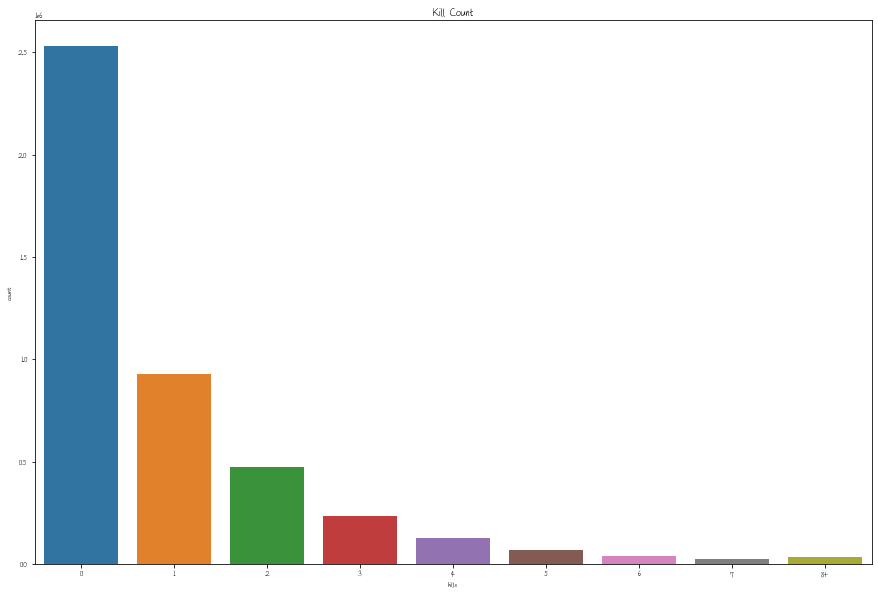

In [64]:
data = train_data.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

## Damage Dealt by 0 Kills

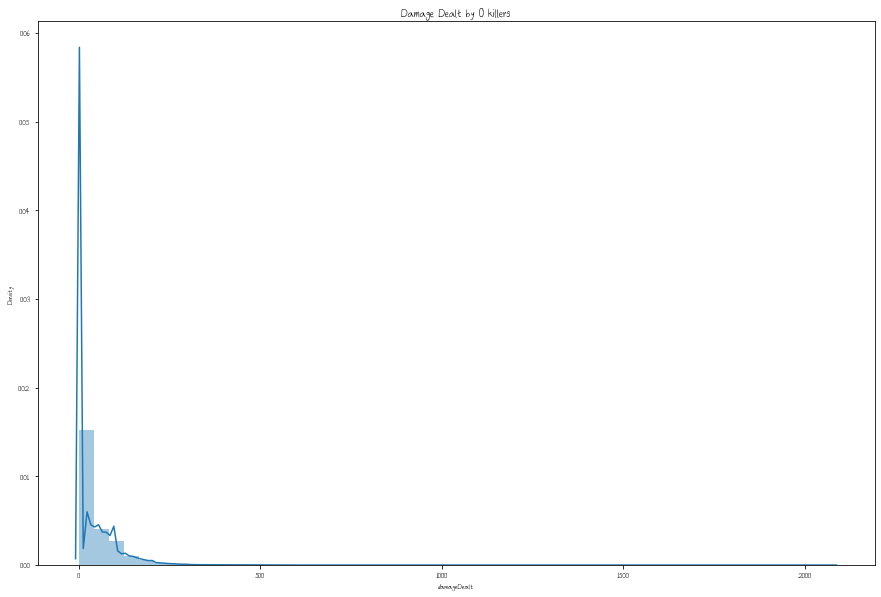

In [65]:
data = train_data.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

In [66]:
print("{}의 유저({:.4f}%)는 킬을 하지도 않고도 우승했다".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train_data)))

data1 = train_data[train_data['damageDealt'] == 0].copy()
print("{}의 유저({:.4f}%)는 데미지를 가하지 않고 우승했다".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train_data)))

16666의 유저(0.3748%)는 킬을 하지도 않고도 우승했다
4770의 유저(0.1073%)는 데미지를 가하지 않고 우승했다


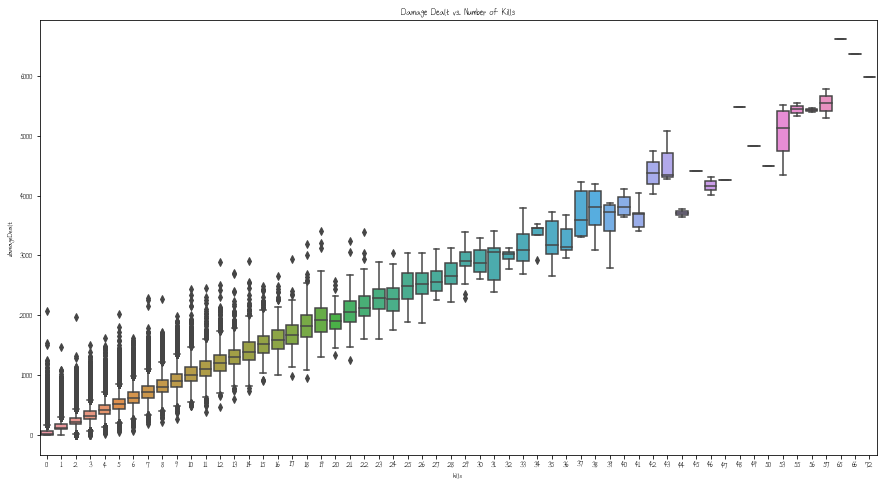

In [67]:
plt.figure(figsize=(15,8))
ax1 = sns.boxplot(x="kills",y="damageDealt", data = train_data)
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.show()

* 킬과 데미지의 상관괸계
* 킬을 많이 한 유저가 데미지도 많이 가했다

## walk

![nn](./maxresdefault2.jpg)

In [68]:
print('유저들의 평균 뛴 거리:', train_data['walkDistance'].mean())
print('유저들 중 최소 뛴  거리:', train_data['walkDistance'].min())
print('유저들 중 최다 뛴 거리:', train_data['walkDistance'].max())
print('0미터를 뛴 유저들의 수:', len(data[data['walkDistance'] == 0]))

유저들의 평균 뛴 거리: 1154.2178590962687
유저들 중 최소 뛴  거리: 0.0
유저들 중 최다 뛴 거리: 25780.0
0미터를 뛴 유저들의 수: 98054


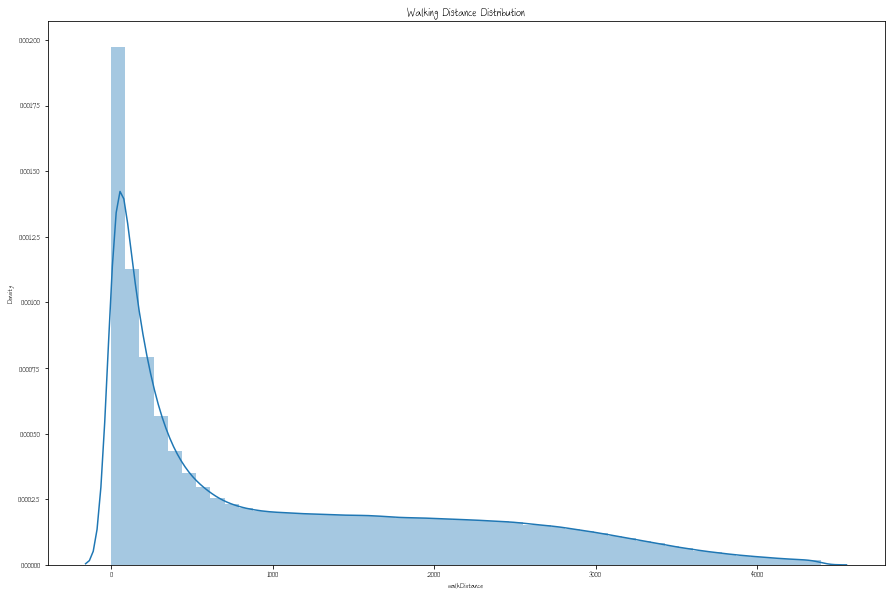

In [69]:
data = train_data.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

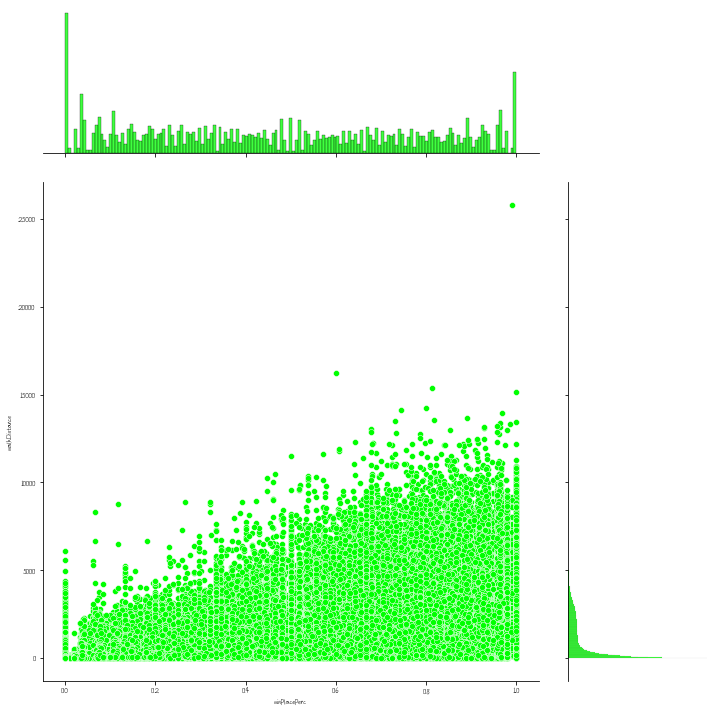

In [70]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train_data, height=10, ratio=3, color="lime")
plt.show()

* 뛴 거리와 등수의 상관관계
* 많이 뛴 유저가 등수가 높다

## Ride

![nn](./91562_150382_494.jpg)

In [71]:
print('유저들의 차량 이동 평균 거리:', train_data['rideDistance'].mean())
print('유저들 중 차량 이동 최소 거리:', train_data['rideDistance'].min())
print('유저들 중 차량 이동 최대 거리:', train_data['rideDistance'].max())
print('차량 이동 거리가 0미터인 유저:', len(data[data['rideDistance'] == 0]))
print('차량을 파괴하는 유저의 수:', len(train_data['vehicleDestroys']))

유저들의 차량 이동 평균 거리: 606.115669154093
유저들 중 차량 이동 최소 거리: 0.0
유저들 중 차량 이동 최대 거리: 40710.0
차량 이동 거리가 0미터인 유저: 3295246
차량을 파괴하는 유저의 수: 4446966


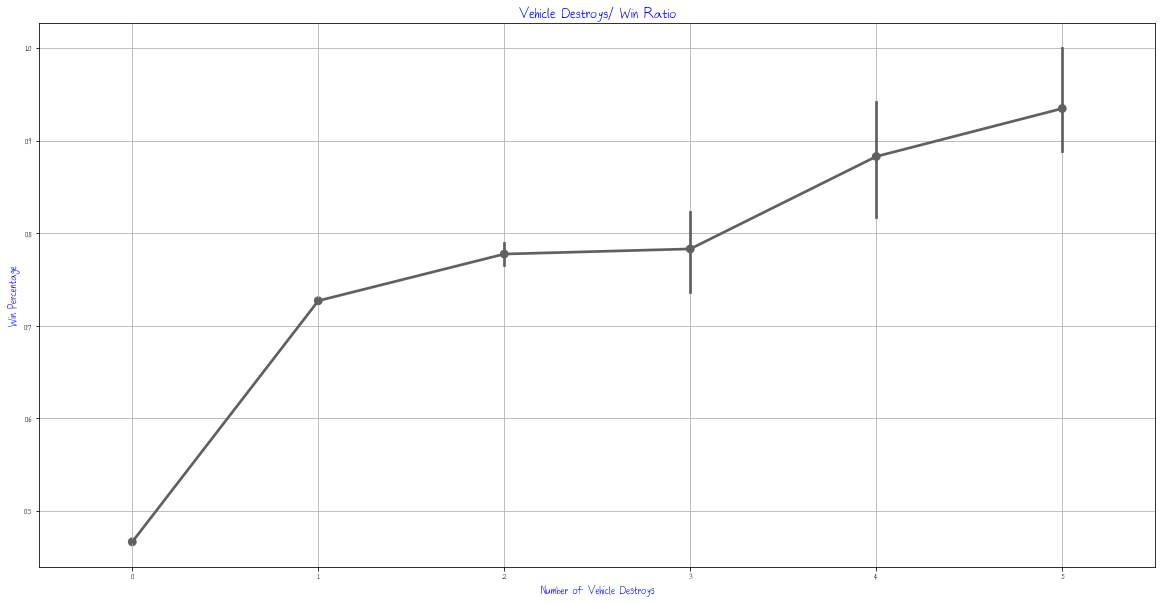

In [72]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

차량을 파괴하는 유저일수록 등수가 높다

## Swim

![nn](./maxresdefault3.jpg)

In [73]:
print('유저들의 평균 수영 거리:', train_data['swimDistance'].mean())
print('유저들 중 수영 최단 거리:', train_data['swimDistance'].min())
print('유저들 중 수영 최단 거리:', train_data['swimDistance'].max())

유저들의 평균 수영 거리: 4.509322451307243
유저들 중 수영 최단 거리: 0.0
유저들 중 수영 최단 거리: 3823.0


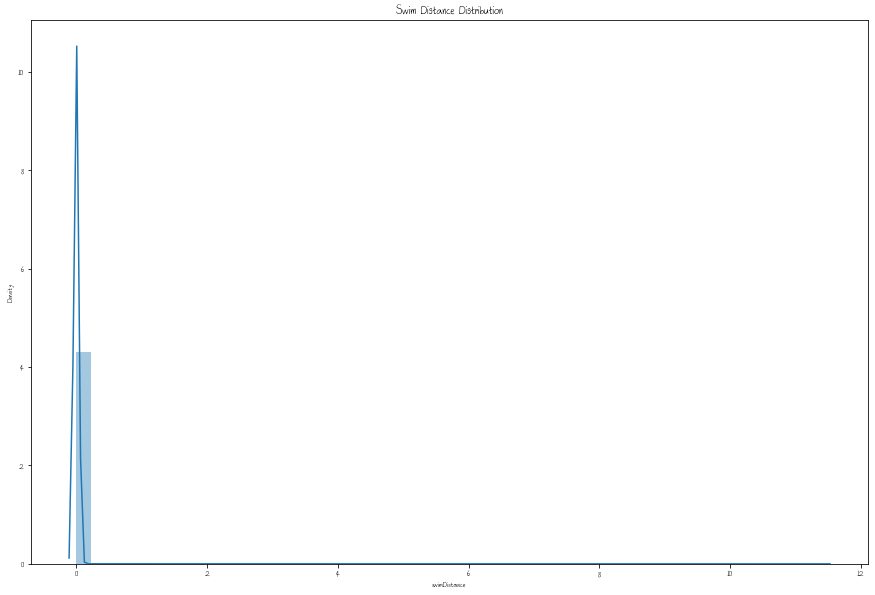

In [74]:
data = train_data.copy()
data = data[data['swimDistance'] < data['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

대부분으 유저들은 수영을 하지 않는다

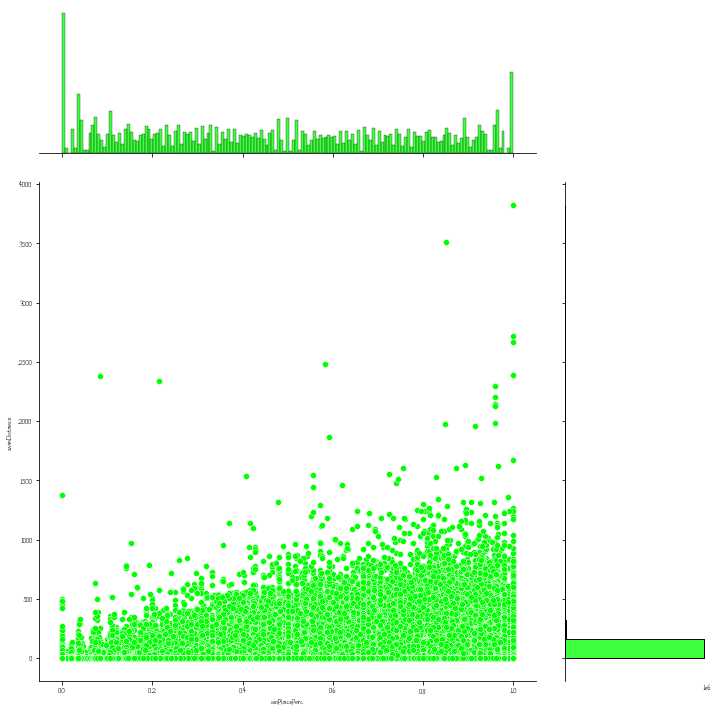

In [75]:
sns.jointplot(x="winPlacePerc", y="swimDistance",  data=train_data, height=10, ratio=3, color="lime")
plt.show()

수영거리와 등수의 상관관계를 보면 수영을 많이 하는 유저가 등수도 높다

## Heals & Boosts

![nn](./998F383B5E2570AD26.png)

In [76]:
print('유저들의 평균 치료 아이템 사용 개수:', train_data['heals'].mean())
print('유저들 중 가장 많은 치료 아이템 사용 개수:', train_data['heals'].max())
print('95% 유저들의 치료 아이템 사용 개수:', train_data['heals'].quantile(0.95))

유저들의 평균 치료 아이템 사용 개수: 1.370147196987789
유저들 중 가장 많은 치료 아이템 사용 개수: 80
95% 유저들의 치료 아이템 사용 개수: 7.0


In [77]:
print('유저들의 평균 부스트 사용 개수:', train_data['boosts'].mean())
print('유저들 중 가장 많은 부스트 사용 개수:', train_data['boosts'].max())
print('95% 유저들의 부스트 사용 개수:', train_data['boosts'].quantile(0.95))

유저들의 평균 부스트 사용 개수: 1.1069077209045448
유저들 중 가장 많은 부스트 사용 개수: 33
95% 유저들의 부스트 사용 개수: 5.0


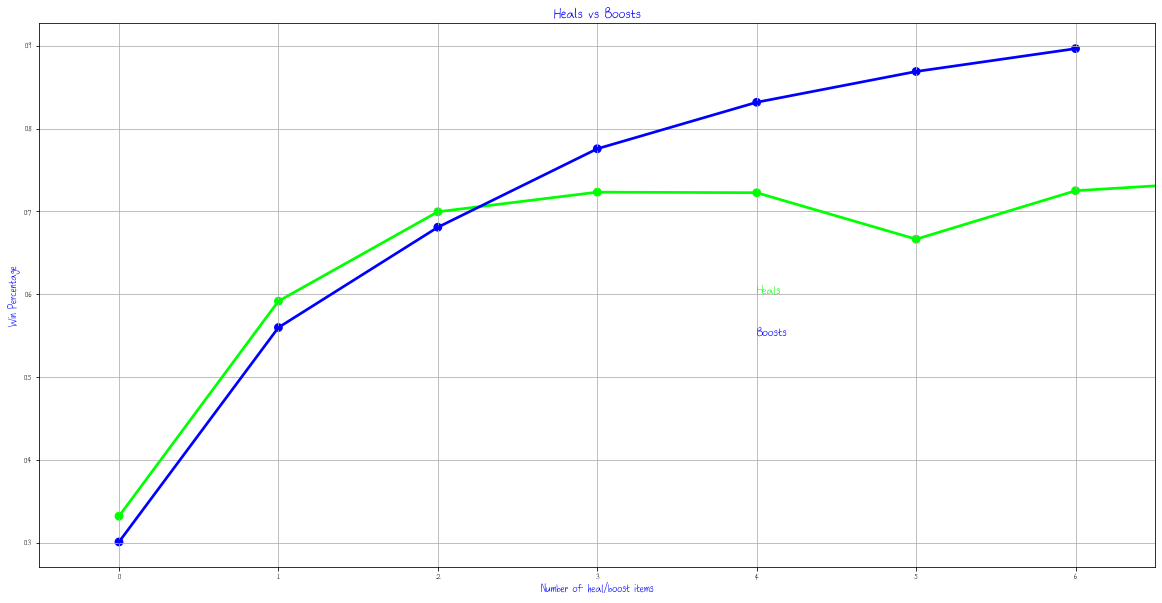

In [78]:
data = train_data.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

heals & boosts의 사용개수와 등수의 상관관계
heals & boosts 아이템을 많이 사용할 수록 등수가 높다

## 결측치 확인 및 제거

<AxesSubplot:>

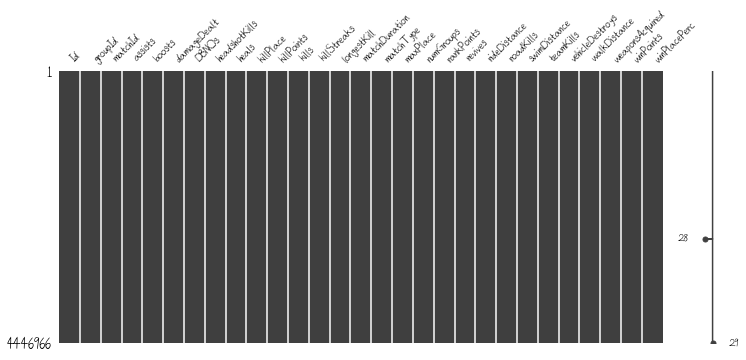

In [79]:
msno.matrix(train_data, figsize=(12, 5))

<AxesSubplot:>

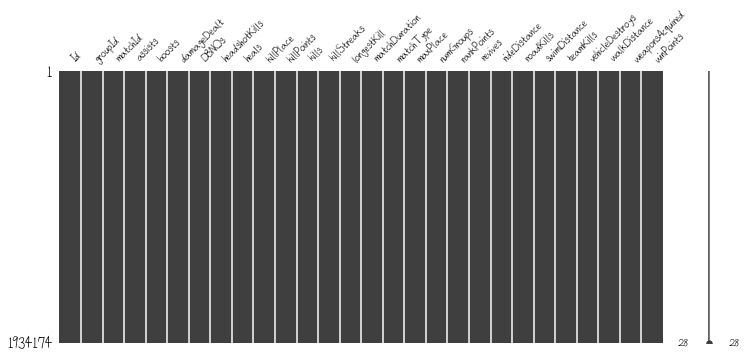

In [80]:
msno.matrix(test_data, figsize=(12, 5))

In [3]:
train_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
train_data[train_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


train 데이터 2744604번째 colum에 결측치가 있는 것을 확인할 수 있음

데이터가 많고 결측치가 있는 행은 1개이기 때문에 그냥 행을 삭제한다

In [5]:
train_df = train_data.dropna(axis=0)

In [6]:
print('결측치 처리 전 데이터 shape ', train_data.shape)
print('결측치 처리 후 데이터 shape ', train_df.shape)

결측치 처리 전 데이터 shape  (4446966, 29)
결측치 처리 후 데이터 shape  (4446965, 29)


## 이상치 확인 및 제거

* 움직인 거리가 0인데 무기를 가지고 있는 것이 이상하다
* 불법프로그램일 확률이 높아 이 값들을 제거하는 것이 바람직하다

In [7]:
outlier = train_df[(train_data['walkDistance'] == 0) & (train_df['weaponsAcquired'] > 1)]
outlier

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
846,0df7c355497d77,325464bcf4c846,f3a64f99badeca,0,0,0.00,0,0,0,5,...,0,0.0,0,0.0,0,0,0.0,6,0,0.0000
1357,72f70c6c074ca9,da042db555b932,f3c5fa51aacb95,0,0,722.80,0,0,0,5,...,0,0.0,0,0.0,0,0,0.0,15,0,0.0000
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0,0.0,0,0.0,0,0,0.0,8,0,0.8571
2640,62f59fc192169d,9151ba6ff83a5a,827e75036742f3,0,0,291.50,0,0,0,7,...,0,0.0,0,0.0,0,0,0.0,2,0,0.0000
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.00,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,3,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444608,7aaea5e56f5c75,e7289bd09b496b,4b4554e7c2a741,0,0,0.00,0,0,0,56,...,0,0.0,0,0.0,0,0,0.0,8,0,0.0714
4445068,9450fc9e3a53de,a77d70a6de206d,70357848de1236,0,0,166.10,0,0,0,12,...,0,0.0,0,0.0,0,0,0.0,3,0,0.0000
4446093,2f57d1e882cc06,1c59e2133a2fbd,0027b1ffb2e346,0,0,116.80,0,0,0,3,...,0,0.0,0,0.0,0,0,0.0,11,0,1.0000
4446318,13ca7294094cfb,0e120a8d2f6105,07baf6b1ba3de9,0,0,0.00,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,21,0,0.0000


In [8]:
train = train_df.drop(outlier.index, axis=0)

In [9]:
print('이상치 처리 전 데이터 shape ', train_df.shape)
print('이상치 처리 후 데이터 shape', train.shape)

이상치 처리 전 데이터 shape  (4446965, 29)
이상치 처리 후 데이터 shape (4439144, 29)


## Feature Selection

* 모델에 적용하기 전 필요한 feature만 선택하여야 한다
* feature가 많다고 좋은 것도 아니고 적다고 좋은 것도 아니기 때문에 적절히 필요한 것만 사용한다

winPlacePerc와 상관관계가 높은 feature를 선택

<AxesSubplot:>

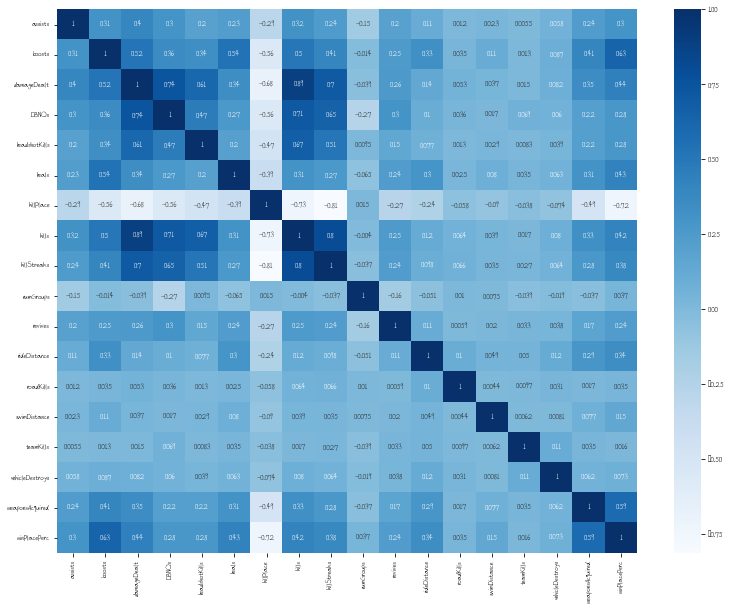

In [46]:
train_corr = train[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc']]
plt.figure(figsize=(13,10))
sns.heatmap(train_corr.corr(), annot=True, cmap='Blues')

In [10]:
x_train = train[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'weaponsAcquired']]
x_test = test_data[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'numGroups', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'weaponsAcquired']]
y_train = train['winPlacePerc']
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(4439144, 17)
(1934174, 17)
(4439144,)


In [11]:
x_train.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired
4446961,0,0,0.00,0,0,0,74,0,0,28,0,1292.0,0,0.000,0,0,3
4446962,0,1,44.15,0,0,0,69,0,0,93,0,0.0,0,0.000,0,0,6
4446963,0,0,59.06,0,0,0,66,0,0,28,0,0.0,0,2.184,0,0,4
4446964,0,4,180.40,1,1,2,11,2,1,25,2,0.0,0,0.000,0,0,8
4446965,0,2,268.00,0,0,1,18,2,1,94,0,1369.0,0,0.000,0,0,5


In [12]:
x_test.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,weaponsAcquired
0,0,0,51.46,0,0,0,73,0,0,28,0,0.0,0,0.0,0,0,1
1,0,4,179.10,0,0,2,11,2,1,47,2,4669.0,0,0.0,0,0,6
2,1,0,23.40,0,0,4,49,0,0,27,0,0.0,0,0.0,0,0,4
3,0,0,65.52,0,0,0,54,0,0,44,0,0.0,0,0.0,0,0,3
4,0,4,330.20,1,2,1,7,3,1,27,1,0.0,0,0.0,0,0,4


In [13]:
y_train.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

## Model 생성 및 검증

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=0) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3551315, 17)
(887829, 17)
(3551315,)
(887829,)


### 랜덤포레스트

In [14]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [15]:
pred = model.predict(x_test)
print(pred.shape)
pred

(887829,)


array([0.924567, 0.864963, 0.403357, ..., 0.237746, 0.555564, 0.679189])

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_test, pred_test)

print('train rmse:', np.sqrt(mse_train))
print('test rmse:', np.sqrt(mse_val))

train rmse: 0.049028959353241246
test rmse: 0.10605930190876751


### GradientBoostingRegressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [16]:
pred_gbr = gbr.predict(x_test)
print(pred_gbr.shape)
pred_gbr

(887829,)


array([0.8846471 , 0.84888204, 0.55838373, ..., 0.23734015, 0.57290853,
       0.66866698])

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
pred_gbr_train = gbr.predict(x_train)
pred_gbr_test = gbr.predict(x_test)

mse_gbr_train = mean_squared_error(y_train, pred_gbr_train)
mse_gbr_val = mean_squared_error(y_test, pred_gbr_test)

print('train rmse:', np.sqrt(mse_gbr_train))
print('test rmse:', np.sqrt(mse_gbr_val))

train rmse: 0.11356075918250665
test rmse: 0.11351057646207044


### RidgeRegression

In [21]:
from sklearn.linear_model import Ridge

rgr = Ridge(alpha=50, normalize=True)
rgr.fit(x_train, y_train)

Ridge(alpha=50, normalize=True)

In [22]:
pred_rgr = rgr.predict(x_test)
print(pred_rgr.shape)
pred_rgr

(887829,)


array([0.49762513, 0.50295211, 0.48183904, ..., 0.45745897, 0.48161564,
       0.48231969])

In [23]:
pred_rgr_train = rgr.predict(x_train)
pred_rgr_test = rgr.predict(x_test)

mse_rgr_train = mean_squared_error(y_train, pred_rgr_train)
mse_rgr_val = mean_squared_error(y_test, pred_rgr_test)

print('train rmse:', np.sqrt(mse_rgr_train))
print('test rmse:', np.sqrt(mse_rgr_val))

train rmse: 0.2938374537704161
test rmse: 0.2939238463877158


### Lasso

In [24]:
from sklearn.linear_model import Lasso

lgr = Lasso(alpha=50, normalize=True)
lgr.fit(x_train, y_train)

Lasso(alpha=50, normalize=True)

In [25]:
pred_lgr = lgr.predict(x_test)
print(pred_lgr.shape)
pred_lgr

(887829,)


array([0.47334427, 0.47334427, 0.47334427, ..., 0.47334427, 0.47334427,
       0.47334427])

In [26]:
pred_lgr_train = lgr.predict(x_train)
pred_lgr_test = lgr.predict(x_test)

mse_lgr_train = mean_squared_error(y_train, pred_lgr_train)
mse_lgr_val = mean_squared_error(y_test, pred_lgr_test)

print('train rmse:', np.sqrt(mse_lgr_train))
print('test rmse:', np.sqrt(mse_lgr_val))

train rmse: 0.30708128749746366
test rmse: 0.3071521415026291


### 랜덤포레스트를 이용한 예측값 submission

In [14]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [15]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [16]:
predicted = model.predict(x_test)
print(predicted.shape)
predicted

(1934174,)


array([0.2771615, 0.939006 , 0.725836 , ..., 0.721658 , 0.861226 ,
       0.09657  ])

In [27]:
len(predicted)

1934174

[Text(0.5, 1.0, 'test')]

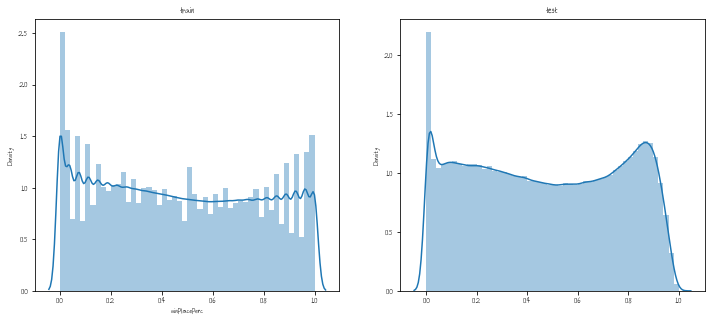

In [17]:
# 예측 데이터를 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title='train')
sns.distplot(predicted, ax=ax2, bins=50)
ax2.set(title='test')

In [ ]:
pred_df = DataFrame(predicted)
pred_df.to_csv('./submission.csv')